In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
import warnings 
warnings.simplefilter(action='ignore')


data=pd.read_csv('voice.csv')

print(data.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

<Figure size 800x800 with 0 Axes>

In [69]:
print(data.shape)

(3168, 21)


In [70]:
print(data.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


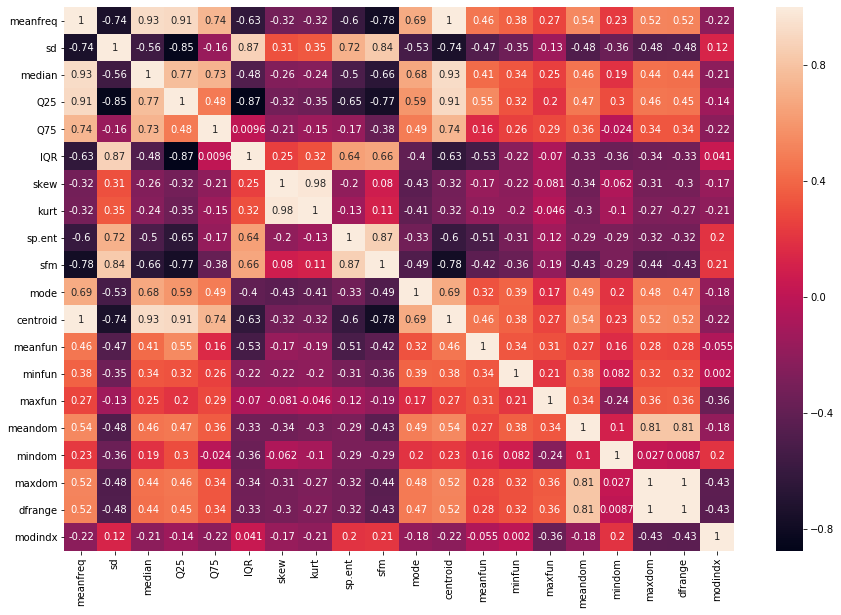

In [104]:
c=data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(c, annot=True)
plt.show()

In [72]:
print("The total number of instances, ",data['label'].shape[0])
print("Total number of instances with results 'Male' ", data[data.label=='male'].shape[0])
print("The total number of instances with results 'Female' ", data[data.label=='female'].shape[0])
                                                                                 

The total number of instances,  3168
Total number of instances with results 'Male'  1584
The total number of instances with results 'Female'  1584


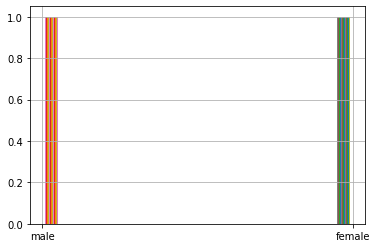

In [73]:
data['label'].hist()
plt.show()

In [74]:
X = data.drop('label', axis=1)
y =  data['label']

print(list(X.columns))
print("The type of data in y",y.dtype)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
The type of data in y object


In [75]:
from sklearn.preprocessing import LabelEncoder

g_encoder=LabelEncoder()
y=g_encoder.fit_transform(y)
print(y)

[1 1 1 ... 0 0 0]


In [88]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler() 

X = scale.fit_transform(X)



In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

## Linear Kernel


In [98]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("The accuracy for the above model is %.4f%%"%(accuracy_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))

The accuracy for the above model is 98.4704%
[[486  10]
 [  6 544]]


## RBF Kernel

In [99]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("The accuracy for the above model is %.4f%%"%(accuracy_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))

The accuracy for the above model is 98.4704%
[[486  10]
 [  6 544]]


## Polynomial Kernel

In [97]:
model = SVC(kernel='poly')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("The accuracy for the above model is %.4f%%"%(accuracy_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))

The accuracy for the above model is 96.1759%
[[463  33]
 [  7 543]]
